In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("done")

done


# Training Set

In [ ]:
df_train = pd.read_csv('train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Testing Set

In [ ]:
df_test = pd.read_csv('test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
target = ['Survived']

# Clean Data Sets

In [ ]:
# Fill Cabin Null Values

import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
full_data = [df_train, df_test]

for dataset in full_data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
    
df_train = df_train.drop(['Cabin'], axis=1)
df_test = df_test.drop(['Cabin'], axis=1)

In [ ]:
# Drop PassengerID and Ticket Columns

df_train = df_train.drop(['PassengerId', 'Ticket'], axis = 1)
# testing data requires PassengerID column for submission
df_test = df_test.drop(['Ticket'], axis = 1)

In [ ]:
# Fill Fare Null Values

df_train.Fare.fillna(df_train.Fare.median(), inplace=True)
df_test.Fare.fillna(df_test.Fare.median(), inplace=True)

In [ ]:
#Fill Embarked Null Values

df_train.Embarked.fillna(df_train.Embarked.mode()[0], inplace=True)
df_test.Embarked.fillna(df_test.Embarked.mode()[0], inplace=True)

In [ ]:
#Fill Age Null Values

# can be replaced with fillna Age.median()
full_data = [df_train, df_test]

for data in full_data:
    mean = df_train["Age"].mean()
    std = df_test["Age"].std()
    nulls = data["Age"].isnull().sum()
    rand = np.random.randint(low=mean-std, high=mean+std, size=nulls)
    Age2 = data["Age"].copy()
    Age2[np.isnan(Age2)] = rand
    data["Age"] = Age2
    data["Age"] = df_train["Age"].astype(int)

### Check for Null Values

In [ ]:
df_test["Age"].isnull().sum()

0

In [ ]:
df_train["Age"].isnull().sum()

0

In [ ]:
df_train.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Deck        0
dtype: int64

In [ ]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Deck           0
dtype: int64

# Add Features

In [ ]:
# Age Categories

full_data = [df_train, df_test]

for data in full_data:
    data['AgeBin'] = pd.qcut(data['Age'].astype(int), 5)

df_train['AgeBin'].value_counts()

(-0.001, 19.0]    203
(25.0, 32.0]      180
(19.0, 25.0]      176
(32.0, 40.0]      173
(40.0, 80.0]      159
Name: AgeBin, dtype: int64

In [ ]:
# Fare Categories

full_data = [df_train, df_test]

for data in full_data:
    data['FareBin'] = pd.qcut(data['Fare'], 4)

df_train['FareBin'].value_counts()

(7.91, 14.454]     224
(-0.001, 7.91]     223
(31.0, 512.329]    222
(14.454, 31.0]     222
Name: FareBin, dtype: int64

In [ ]:
# Family Size

full_data = [df_train, df_test]

for data in full_data:
    data['FamilySize'] = data.SibSp + data.Parch

df_train['FamilySize'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: FamilySize, dtype: int64

In [ ]:
# Alone or Not (1 or 0)

full_data = [df_train, df_test]

for data in full_data:
    data['IsAlone'] = 1
    data['IsAlone'].loc[data['FamilySize'] > 1] = 0

df_train['IsAlone'].value_counts()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


1    698
0    193
Name: IsAlone, dtype: int64

In [ ]:
# Title Categories

full_data = [df_train, df_test]

for data in full_data:
    data['Title'] = data['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
    title_names = (data.Title.value_counts() < 10) 
    data['Title'] = data['Title'].apply(lambda x: 'Other' if title_names.loc[x] == True else x) 
    data.drop('Name', axis = 1, inplace= True)
    
df_train['Title'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Other      27
Name: Title, dtype: int64

# Heat Map

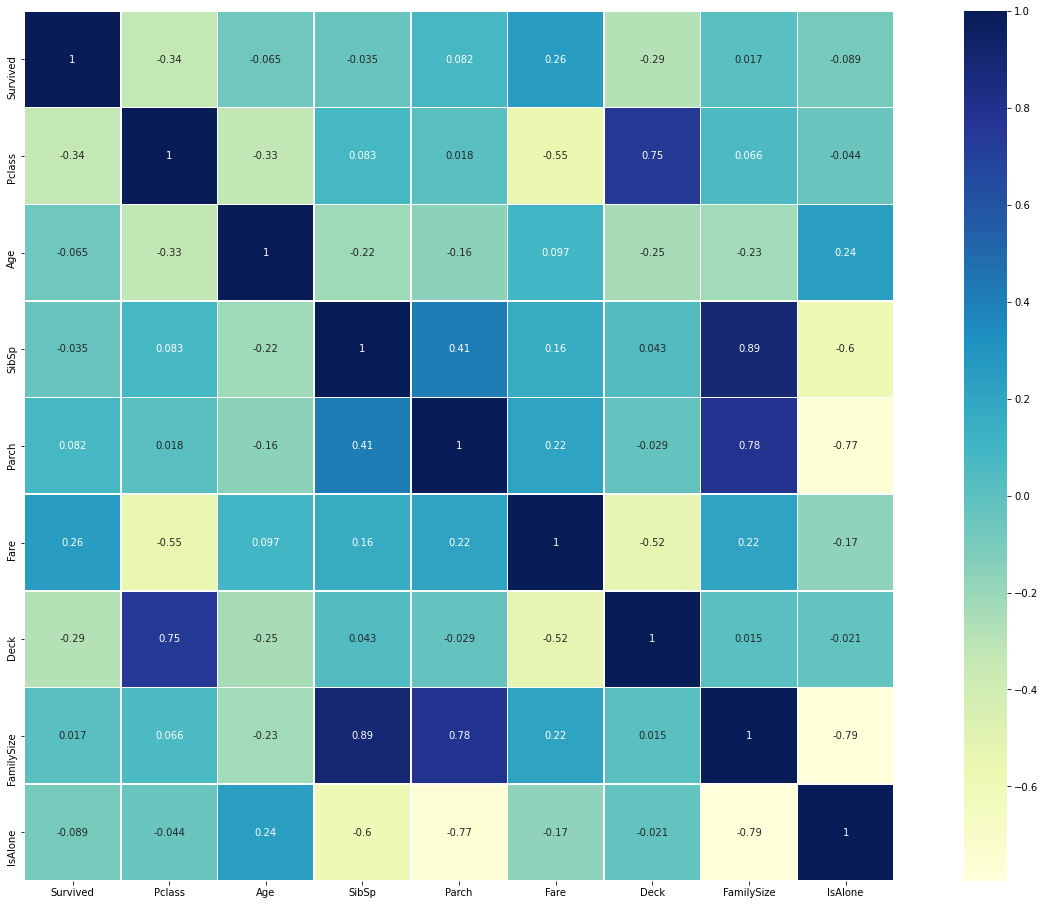

In [ ]:
f, ax = plt.subplots(figsize = [25,16])
sns.heatmap(df_train.corr(),linewidths = .5, annot = True, cmap = 'YlGnBu', square = True)

# Label Encode

In [ ]:
target = ['Survived']

In [ ]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
full_data = [df_train, df_test]

for data in full_data:
    data['Sex'] = label.fit_transform(data['Sex'])
    data['Embarked'] = label.fit_transform(data['Embarked'])
    data['Title'] = label.fit_transform(data['Title'])
    data['Age'] = label.fit_transform(data['AgeBin'])
    data['Fare'] = label.fit_transform(data['FareBin'])

In [ ]:
full_data = [df_train, df_test]

for data in full_data:
    data.drop(['FareBin', 'AgeBin'], axis = 1, inplace = True)

In [ ]:
full_data = [df_train, df_test]

for data in full_data:
    columns_train = [col for col in data.columns.tolist() if col not in target]
    data = pd.get_dummies(data, columns = columns_train)

In [ ]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,FamilySize,IsAlone,Title
0,0,3,1,1,1,0,0,2,8,1,1,2
1,1,1,0,3,1,0,3,0,3,1,1,3
2,1,3,0,2,0,0,1,2,8,0,1,1
3,1,1,0,3,1,0,3,2,3,1,1,3
4,0,3,1,3,0,0,1,2,8,0,1,2


# Split Data

In [ ]:
from sklearn import svm
from sklearn import model_selection
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
print("done")

done


In [ ]:
train_length = len(df_train)
train = df_train[:train_length]

test_length = len(df_test)
test = df_test[:test_length]

train.shape, test.shape

((891, 12), (418, 12))

In [ ]:
train["Survived"] = train["Survived"].astype(int)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,FamilySize,IsAlone,Title
0,0,3,1,1,1,0,0,2,8,1,1,2
1,1,1,0,3,1,0,3,0,3,1,1,3
2,1,3,0,2,0,0,1,2,8,0,1,1
3,1,1,0,3,1,0,3,2,3,1,1,3
4,0,3,1,3,0,0,1,2,8,0,1,2


In [ ]:
columns_train = [col for col in train.columns.tolist() if col not in target]
label = train['Survived']
train = train[columns_train]
train.shape

(891, 11)

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(train, label, test_size = 0.20, random_state = 13)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((712, 11), (712,), (179, 11), (179,))

# PCA Dimensionality Reduction

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
print("done")

done


In [ ]:
print(X_train.shape)

(712, 11)


In [ ]:
print(y_train.shape)

(712,)


In [ ]:
print(X_test.shape)

(179, 11)


In [ ]:
print(y_test.shape)

(179,)


### X PCA Reduction

In [ ]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
pca = PCA(.551)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.551, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pca.n_components_

2

In [ ]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
print(X_train.shape)

(712, 2)


In [ ]:
print(X_test.shape)

(179, 2)


### Y Dimensional Expansion

In [ ]:
a = y_train.copy(deep=True)
y_train = pd.concat([y_train, a], axis=1)
y_train = y_train.to_numpy()
print(y_train)

[[0 0]
 [0 0]
 [0 0]
 ...
 [1 1]
 [0 0]
 [1 1]]


In [ ]:
b = y_test.copy(deep=True)
y_test = pd.concat([y_test, b], axis=1)
y_test = y_test.to_numpy()
print(y_test)

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]

In [ ]:
print(type(y_train))
print(y_train.shape)

<class 'numpy.ndarray'>
(712, 2)


In [ ]:
print(type(y_test))
print(y_test.shape)

<class 'numpy.ndarray'>
(179, 2)


### Y Dimensional Reduction

In [ ]:
a = a.to_numpy()
y_train2 = a.reshape((-1,1))
print(type(y_train2))
print(y_train2.shape)
print(y_train2)

<class 'numpy.ndarray'>
(712, 1)
[[0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [

In [ ]:
b = b.to_numpy()
y_test2 = b.reshape((-1,1))
print(type(y_test2))
print(y_test2.shape)
print(y_test2)

<class 'numpy.ndarray'>
(179, 1)
[[0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]]


# Train the Model

### Support Vector Machine

In [ ]:
# Train the Linear SVM
clf = svm.SVC(kernel='linear') 
clf.fit(X_train, y_train2)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = clf.predict(X_test)
print("Accuracy: ", metrics.accuracy_score(y_test2, y_pred))

Accuracy:  0.7206703910614525


### Quantum Support Vector Machine

In [ ]:
!pip install qiskit
import qiskit
from qiskit import BasicAer
from qiskit.aqua import QuantumInstance
from qiskit.circuit.library import ZZFeatureMap
from qiskit.circuit.library import ZFeatureMap
from qiskit.aqua.algorithms import QSVM
from qiskit.aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name
from qiskit.aqua.components.multiclass_extensions import AllPairs
print("done")

     |████████████████████████████████| 6.1MB 2.9MB/s 
     |████████████████████████████████| 18.0MB 171kB/s 
     |████████████████████████████████| 235kB 42.5MB/s 
     |████████████████████████████████| 215kB 43.8MB/s 
     |████████████████████████████████| 2.1MB 34.7MB/s 
     |████████████████████████████████| 952kB 41.4MB/s 
     |████████████████████████████████| 1.5MB 25.8MB/s 
     |████████████████████████████████| 33.9MB 86kB/s 
     |████████████████████████████████| 51kB 6.4MB/s 
     |████████████████████████████████| 194kB 52.3MB/s 
     |████████████████████████████████| 71kB 8.3MB/s 
     |████████████████████████████████| 645kB 23.2MB/s 
     |████████████████████████████████| 3.2MB 33.3MB/s 
     |████████████████████████████████| 6.3MB 29.7MB/s 
  Created wheel for qiskit: filename=qiskit-0.28.0-cp37-none-any.whl size=11091 sha256=2128cdc2feeef1d0b16fd782e1e2d1034280a7c4764c51e984fe8f74461f7422
  Stored in directory: /root/.cache/pip/wheels/4b/3e/40/3e2821552e033f

/usr/local/lib/python3.7/dist-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')


In [ ]:
training_input = {"A": X_train, "B": y_train}
testing_input = {"A": X_test, "B": y_test}

In [ ]:
print(training_input)

{'A': array([[-0.66378691,  1.59493587],
       [-1.55781154, -0.98189464],
       [-1.53469154, -1.17492614],
       ...,
       [-0.65552836, -0.21330133],
       [ 3.55938567, -1.54388614],
       [-1.37190818, -0.55754082]]), 'B': array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [1, 1],
       [0, 0],
       [1, 1]])}


In [ ]:
print(testing_input)

{'A': array([[ 3.64241988,  0.4691089 ],
       [-1.36240499, -1.42716021],
       [-0.65842738, -1.69131661],
       [-1.46010826, -1.20452742],
       [-1.17650163, -1.00280639],
       [ 1.9599902 ,  2.91913232],
       [-1.17650163, -1.00280639],
       [-1.07879835, -1.22543918],
       [-1.46010826, -1.20452742],
       [-0.95442735, -1.27238336],
       [-1.17650163, -1.00280639],
       [-0.6964101 ,  2.65758677],
       [ 3.02304772,  0.90085416],
       [-1.17650163, -1.00280639],
       [-1.58093153, -0.78886314],
       [-0.63615316,  0.3813231 ],
       [ 2.69920247,  1.09819835],
       [-1.08167154, -0.54060039],
       [ 1.83350274,  0.70125392],
       [ 4.61816104, -2.01789354],
       [ 2.34683701, -1.46083892],
       [ 2.77617787,  1.18268952],
       [-1.33928499, -1.62019171],
       [-1.07879835, -1.22543918],
       [-1.60736766, -0.44086226],
       [-0.77139718, -0.16319075],
       [-1.43698827, -1.39755892],
       [-1.53469154, -1.17492614],
       [-0.235

In [ ]:
seed = 10598
feature_dim = 2

In [ ]:
backend = BasicAer.get_backend("qasm_simulator")
feature_map = ZZFeatureMap(feature_dim, reps=2, entanglement="linear")

In [ ]:
print(feature_map)

     ┌───┐┌──────────────┐                                           ┌───┐»
q_0: ┤ H ├┤ U1(2.0*x[0]) ├──■─────────────────────────────────────■──┤ H ├»
     ├───┤├──────────────┤┌─┴─┐┌───────────────────────────────┐┌─┴─┐├───┤»
q_1: ┤ H ├┤ U1(2.0*x[1]) ├┤ X ├┤ U1(2.0*(π - x[0])*(π - x[1])) ├┤ X ├┤ H ├»
     └───┘└──────────────┘└───┘└───────────────────────────────┘└───┘└───┘»
«     ┌──────────────┐                                           
«q_0: ┤ U1(2.0*x[0]) ├──■─────────────────────────────────────■──
«     ├──────────────┤┌─┴─┐┌───────────────────────────────┐┌─┴─┐
«q_1: ┤ U1(2.0*x[1]) ├┤ X ├┤ U1(2.0*(π - x[0])*(π - x[1])) ├┤ X ├
«     └──────────────┘└───┘└───────────────────────────────┘└───┘


In [ ]:
svm = QSVM(feature_map, training_input, testing_input)
#svm.random_seed = seed

/usr/local/lib/python3.7/dist-packages/qiskit/aqua/algorithms/classifiers/qsvm/qsvm.py:104: DeprecationWarning: The package qiskit.aqua.algorithms.classifiers is deprecated. It was moved/refactored to qiskit_machine_learning.algorithms.classifiers (pip install qiskit-machine-learning). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  'qiskit-machine-learning')


In [ ]:
quantum_instance = QuantumInstance(backend, shots=256, seed_simulator=seed, seed_transpiler=seed)

/usr/local/lib/python3.7/dist-packages/qiskit/aqua/quantum_instance.py:137: DeprecationWarning: The class qiskit.aqua.QuantumInstance is deprecated. It was moved/refactored to qiskit.utils.QuantumInstance (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  'qiskit-terra')


In [ ]:
result = svm.run(quantum_instance)
print("done")

/usr/local/lib/python3.7/dist-packages/qiskit/aqua/algorithms/classifiers/qsvm/qsvm.py:363: DeprecationWarning: The variable qiskit.aqua.aqua_globals is deprecated. It was moved/refactored to qiskit.utils.algorithm_globals (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  num_processes=aqua_globals.num_processes)


done


/usr/local/lib/python3.7/dist-packages/qiskit/aqua/algorithms/classifiers/qsvm/_qsvm_binary.py:109: ComplexWarning: Casting complex values to real discards the imaginary part
  predicted_labels = binarized_predictions.astype(int)


In [ ]:
print(f'Testing success ratio: {result["testing_accuracy"]}')

Testing success ratio: 0.9078212290502793


[[1.07811677 0.08587797 0.10846217 ... 0.18008843 0.0740173  0.18008843]
 [0.08587797 1.03192618 0.31126556 ... 0.0082667  0.13244885 0.0082667 ]
 [0.10846217 0.31126556 1.01430814 ... 0.38191071 0.52796296 0.38191071]
 ...
 [0.18008843 0.0082667  0.38191071 ... 1.0010854  0.3005705  1.0010854 ]
 [0.0740173  0.13244885 0.52796296 ... 0.3005705  1.00025823 0.3005705 ]
 [0.18008843 0.0082667  0.38191071 ... 1.0010854  0.3005705  1.0010854 ]]


/usr/local/lib/python3.7/dist-packages/numpy/matrixlib/defmatrix.py:137: ComplexWarning: Casting complex values to real discards the imaginary part
  return new.astype(intype)


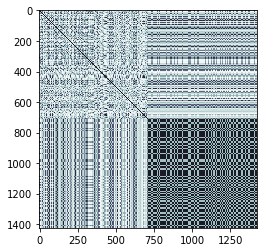

In [ ]:
kernel_matrix = result['kernel_matrix_training']
img = np.asmatrix(kernel_matrix, dtype=float)
print(img)
plt.imshow(img,interpolation='nearest',origin='upper',cmap='bone_r')